<a href="https://colab.research.google.com/github/LeviathansDaughter/LOLIGO-VULGARIS/blob/main/newcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install superscreen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.0/599.0 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting unins

In [2]:
%config InlineBackend.figure_formats = {"retina", "png"}
%matplotlib inline

import os

os.environ["OPENBLAS_NUM_THREADS"] = "1"

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams["font.size"] = 10

import superscreen as sc
from superscreen.geometry import box, circle, rotate
sc.version_table()

Software,Version
SuperScreen,0.12.1
Numpy,2.0.2
Numba,0.60.0
SciPy,1.15.3
matplotlib,3.10.0
IPython,7.34.0
Python,"3.11.13 (main, Jun 4 2025, 08:57:29) [GCC 11.4.0]"
OS,posix [linux]
Number of CPUs,"Physical: 1, Logical: 2"
BLAS Info,Generic


Device(
    "constriction", 
    layers=[
        Layer('base', Lambda=1.700, thickness=None, london_lambda=None, z0=0.000),
    ], 
    films=[
        Polygon(name='film', layer='base', points=<ndarray: shape=(177, 2)>),
    ], 
    holes=[
        Polygon(name='base_hole', layer='base', points=<ndarray: shape=(100, 2)>),
    ], 
    terminals={
        'film': [Polygon(name='source', layer='base', points=<ndarray: shape=(100, 2)>), Polygon(name='drain', layer='base', points=<ndarray: shape=(102, 2)>)],
    }, 
    abstract_regions=None, 
    length_units="um",
)


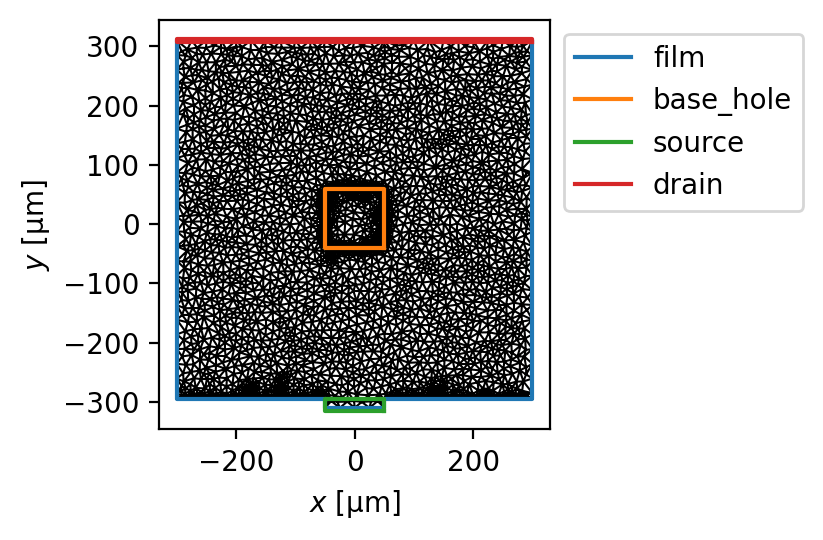

In [56]:
width = 600
height = 620
slot_height =20
slot_width = 250
x0, y0 = center = (0, 0)
length_units = "um"
slit_width=10
slit_height=540
hole_width=100
hole_height=100
layer=sc.Layer("base", Lambda=1.7)
film = sc.Polygon("film", layer="base", points=box(width, height))
slot = sc.Polygon(
    points=box(slot_width, slot_height, center=(-175,-305))

)
film = film.difference(slot, slot.scale(xfact=-1))


drain_terminal = sc.Polygon(
    "drain", points=box(width, height / 100, center=(0, height / 2))
)
source_terminal =  sc.Polygon(
    "source", points=box(100,20, center=(0, -305))
)

device = sc.Device(
    "constriction",
    layers=[layer],
    films=[film],
    terminals={film.name: [source_terminal, drain_terminal]},
    length_units=length_units,
)
device.holes = {
    "base_hole": sc.Polygon( "base_hole",layer="base",
    points=box(hole_width, hole_height, center=(0,10)))
}

mesh = device.make_mesh(min_points=3000, smooth=0)
mesh2 = film.make_mesh(min_points=3000 , smooth=0)
print(device)
print(mesh2)
fig, ax = device.plot_mesh(edge_color="k", show_sites=False)
_ = device.plot_polygons(ax=ax, legend=True)
#fig, ax = device.draw(legend=True)

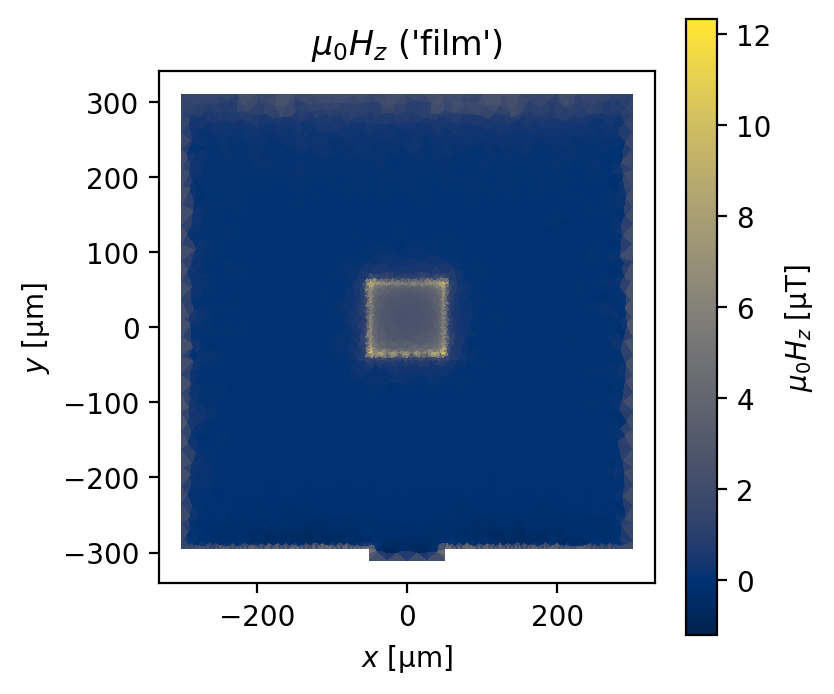

In [60]:
applied_field = sc.sources.ConstantField(1)
solution = sc.solve(device, applied_field=applied_field, field_units="uT")[-1]
# print(device.points) # bro istfg im gonna fucking kill you
# print(device.poly_points)
# print(device.points)
fig, axes = solution.plot_fields()

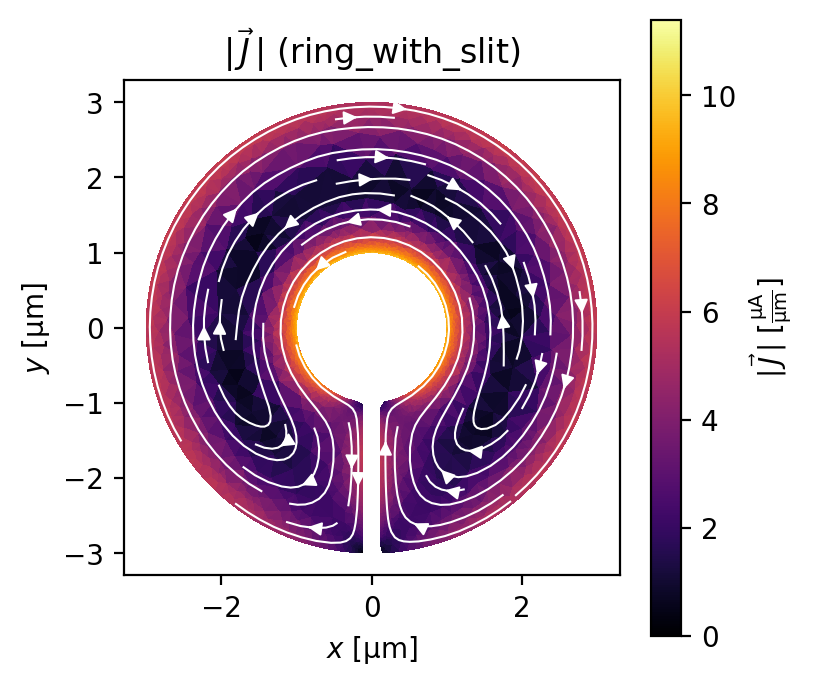

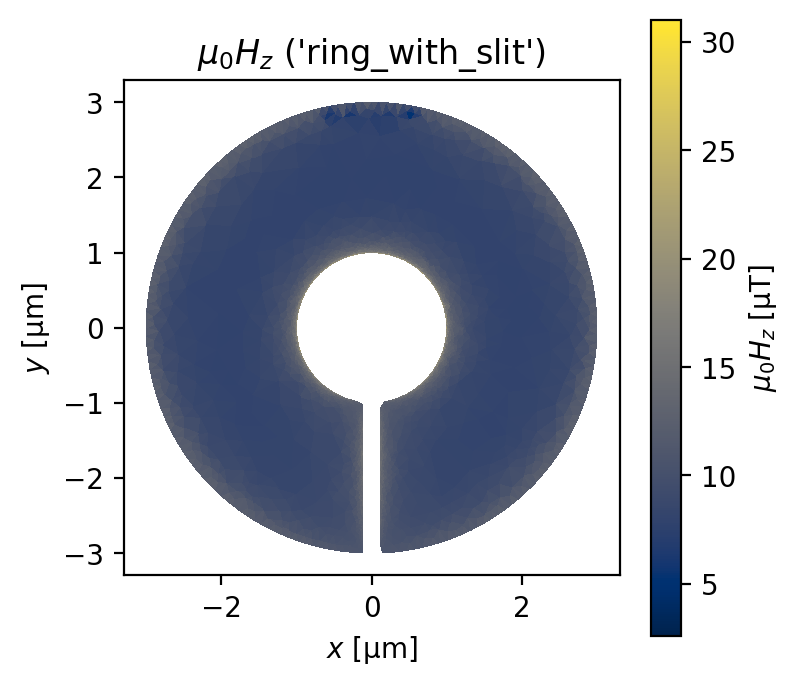

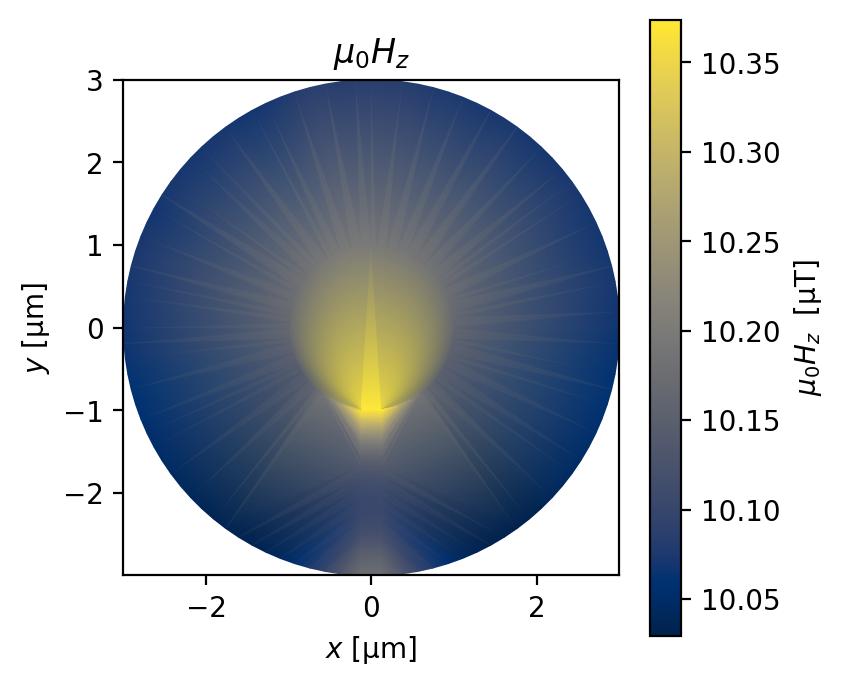

In [69]:
import superscreen as sc
from superscreen.geometry import circle, box
# from superscreen.device import points
# Define the device geometry.
length_units = "um"
ro = 3 # outer radius
ri = 1 # inner radius
slit_width = 0.25
Lambda = 1 # effective penetration depth
# circle() and box() generate arrays of polygon (x, y) coordinates.
ring = circle(ro)
hole = circle(ri)
slit = box(slit_width, 1.5 * (ro - ri), center=(0, -(ro + ri) / 2))
# Define the Polygon representing the superconductor.
layer = sc.Layer("base", Lambda=Lambda)
film = sc.Polygon.from_difference(
[ring, slit, hole], name="ring_with_slit", layer="base"
)
bounding_box = sc.Polygon("bounding_box", layer="base", points=circle(1.2 * ro))
# Create a Device and generate and plot the computational mesh.
device = sc.Device(
film.name,
layers=[layer],
films=[film],
abstract_regions=[bounding_box],
length_units=length_units,
)
device.make_mesh(min_points=3500, smooth=0)
# device.plot(mesh=True)
# Calculate the device's response to a uniform applied field.
applied_field = sc.sources.ConstantField(10)
solution = sc.solve(device, applied_field=applied_field, field_units="uT")[-1]
# Visualize the solution.
# Plot the current density evaluated at each layer in the Device.
fig, ax = solution.plot_currents()
# Plot the magnetic field evaluated at each layer in the Device.
fig, ax = solution.plot_fields()
# Plot the field evaluated at any points in space.
fig, ax = solution.plot_field_at_positions(film.points, zs=0.5)

In [3]:
pip install superscreen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.0/599.0 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninsta

NameError: name 'sc' is not defined

In [5]:
%config InlineBackend.figure_formats = {"retina", "png"}
%matplotlib inline

import os

os.environ["OPENBLAS_NUM_THREADS"] = "1"

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams["font.size"] = 10

import superscreen as sc
from superscreen.geometry import box, circle, rotate
sc.version_table()

Software,Version
SuperScreen,0.12.1
Numpy,2.0.2
Numba,0.60.0
SciPy,1.15.3
matplotlib,3.10.0
IPython,7.34.0
Python,"3.11.13 (main, Jun 4 2025, 08:57:29) [GCC 11.4.0]"
OS,posix [linux]
Number of CPUs,"Physical: 1, Logical: 2"
BLAS Info,Generic


Device(
    "constriction", 
    layers=[
        Layer('base', Lambda=1.700, thickness=None, london_lambda=None, z0=0.000),
    ], 
    films=[
        Polygon(name='film', layer='base', points=<ndarray: shape=(177, 2)>),
    ], 
    holes=[
        Polygon(name='base_hole', layer='base', points=<ndarray: shape=(100, 2)>),
    ], 
    terminals={
        'film': [Polygon(name='source', layer='base', points=<ndarray: shape=(100, 2)>), Polygon(name='drain', layer='base', points=<ndarray: shape=(102, 2)>)],
    }, 
    abstract_regions=None, 
    length_units="um",
)


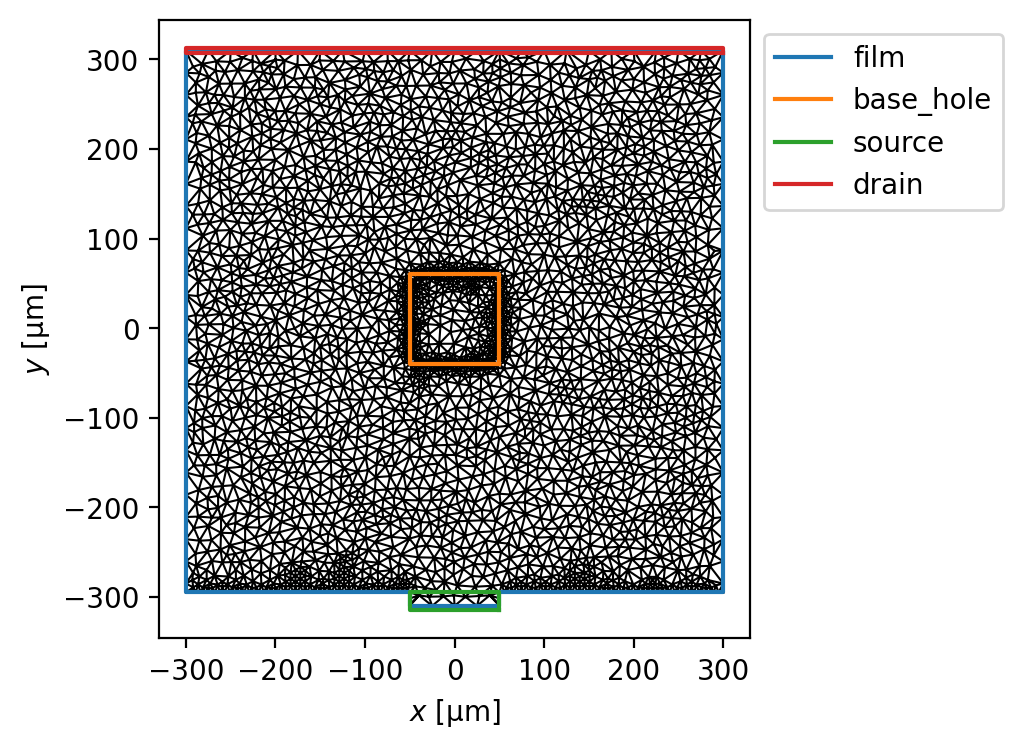

In [71]:
width = 600
height = 620
slot_height =20
slot_width = 250
x0, y0 = center = (0, 0)
length_units = "um"
slit_width=10
slit_height=540
hole_width=100
hole_height=100
layer=sc.Layer("base", Lambda=1.7)
film = sc.Polygon("film", layer="base", points=box(width, height))
slot = sc.Polygon(
    points=box(slot_width, slot_height, center=(-175,-305))

)
film = film.difference(slot, slot.scale(xfact=-1))


drain_terminal = sc.Polygon(
    "drain", points=box(width, height / 100, center=(0, height / 2))
)
source_terminal =  sc.Polygon(
    "source", points=box(100,20, center=(0, -305))
)

device = sc.Device(
    "constriction",
    layers=[layer],
    films=[film],
    terminals={film.name: [source_terminal, drain_terminal]},
    length_units=length_units,
)
device.holes = {
    "base_hole": sc.Polygon( "base_hole",layer="base",
    points=box(hole_width, hole_height, center=(0,10)))
}

mesh = device.make_mesh(min_points=3000, smooth=0)
mesh2 = film.make_mesh(min_points=3000 , smooth=0)
print(device)
print(mesh2)
fig, ax = device.plot_mesh(edge_color="k", show_sites=False)
_ = device.plot_polygons(ax=ax, legend=True)
#fig, ax = device.draw(legend=True)

In [111]:
vortices = [
    sc.Vortex(x=100, y=100, film="film"),
    sc.Vortex(x=-150, y=-150, film="film"),
    sc.Vortex(x=-100, y=-100, film="film"),
]

terminal_currents = {"film": {"source": "200 uA", "drain": "-200 uA"}}

solutions = sc.solve(
    device=device, vortices=vortices, field_units="uT", current_units="uA",
    applied_field=sc.sources.ConstantField(0),
    terminal_currents=terminal_currents,

)
assert len(solutions) == 1
solution = solutions[-1]


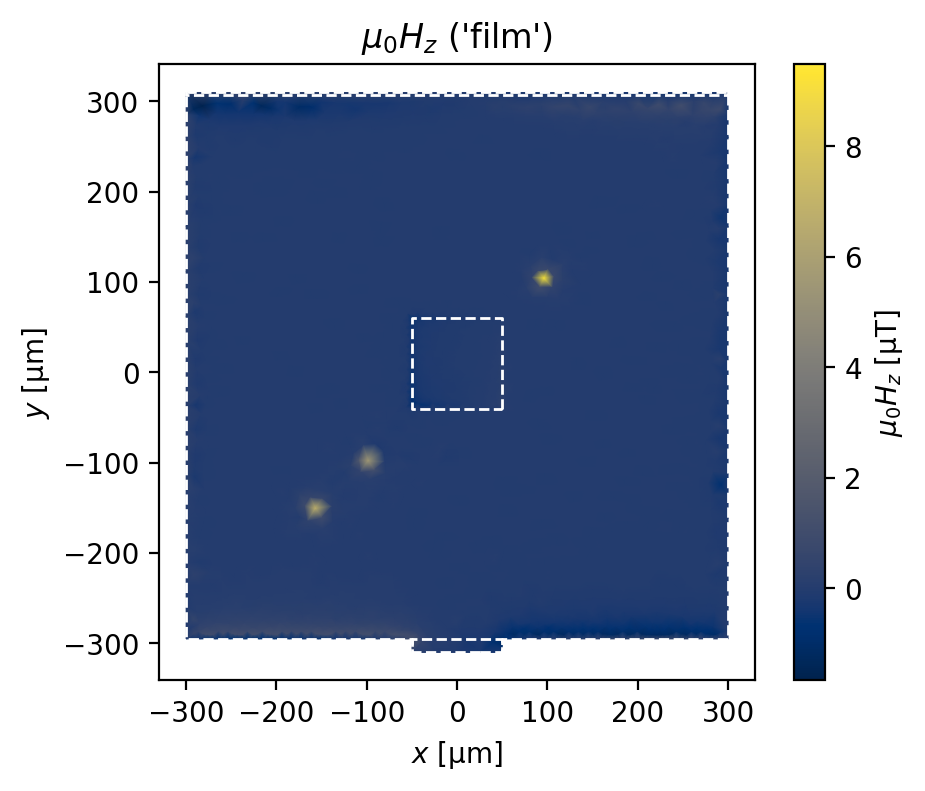

In [84]:
fig, axes = solution.plot_fields(shading="gouraud")
for ax in axes:
    _ = device.plot_polygons(ax=ax, color="w", ls="--", lw=1)

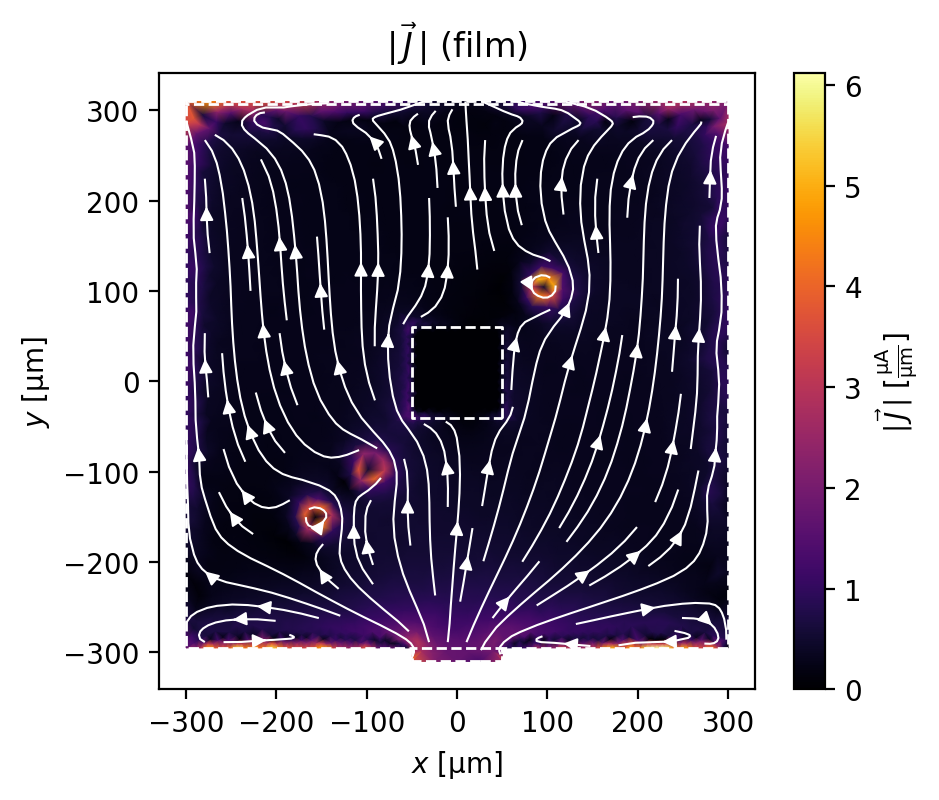

In [112]:
fig, axes = solution.plot_currents(shading="gouraud")
for ax in axes:
    _ = device.plot_polygons(ax=ax, color="w", ls="--", lw=1)

In [16]:
%config InlineBackend.figure_formats = {"retina", "png"}
%matplotlib inline

import os

os.environ["OPENBLAS_NUM_THREADS"] = "1"

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 4)
plt.rcParams["font.size"] = 10

import superscreen as sc
from superscreen.geometry import circle, box


In [23]:
device = sc.Device(
    "ring",
    layers=[sc.Layer("base", london_lambda=0.100, thickness=0.025, z0=0)],
    films=[sc.Polygon("ring", layer="base", points=ring)],
    holes=[sc.Polygon("hole", layer="base", points=hole)],
    length_units=length_units,
)

In [2]:
pip install superscreen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.0/599.0 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting unins

In [3]:
%config InlineBackend.figure_formats = {"retina", "png"}
%matplotlib inline

import os

os.environ["OPENBLAS_NUM_THREADS"] = "1"

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 4)
plt.rcParams["font.size"] = 10

import superscreen as sc
from superscreen.geometry import circle, box

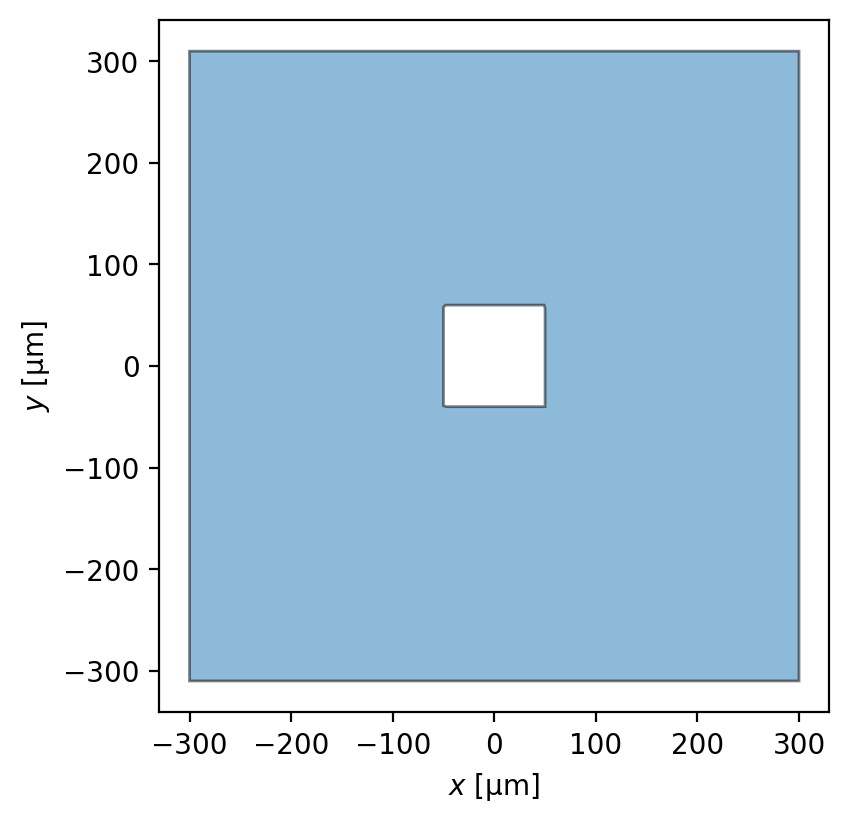

In [4]:
width = 600
height = 620
slot_height =20
slot_width = 250
x0, y0 = center = (0, 0)
length_units = "um"
slit_width=10
slit_height=540
hole_width=100
hole_height=100

length_units = "um"

layers = [sc.Layer("base", Lambda=0.1, z0=0)]

films = [sc.Polygon("film", layer="base", points=box(width, height))]

holes = [
    sc.Polygon("hole0", layer="base", points=box(hole_width, hole_height, center=(0,10))).buffer(0),
    # sc.Polygon("hole1", layer="base", points=box(1, 2.5, center=(-3, 0.25))).buffer(0),
]

device = sc.Device(
    "rect",
    layers=layers,
    films=films,
    holes=holes,
    length_units=length_units,
)

device.make_mesh(smooth=0)

fig, ax = device.draw()

In [5]:
xs = np.linspace(-300, 300, 401)

cross_section_coords = [
    # [x-coords, y-coords]
    np.array([xs, 0 * xs]).T,  # horizontal cross-section
    np.array([xs, -100 * np.ones_like(xs)]).T,  # horizontal cross-section
    np.array([-xs, xs]).T,  # vertical cross-section
]

In [35]:
circulating_currents = {"hole0": "10 uA"}

solutions = sc.solve(
    device,
    circulating_currents=circulating_currents,
    field_units="uT",
    current_units="uA",
)
solution = solutions[-1]

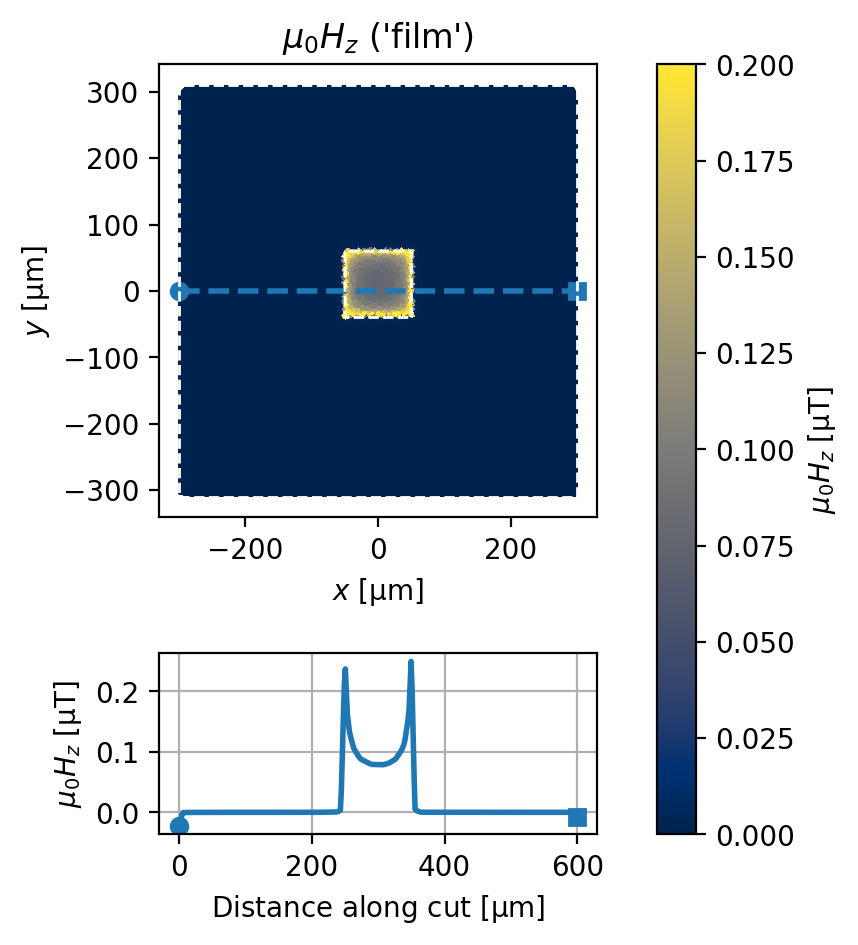

In [37]:
fig, axes = solution.plot_fields(
    cross_section_coords=cross_section_coords[:1], figsize=(4, 5),
    vmax = 0.2, vmin = 0,

)
for ax in axes:
    _ = device.plot_polygons(ax=ax, color="w", ls="--", lw=1) # what.

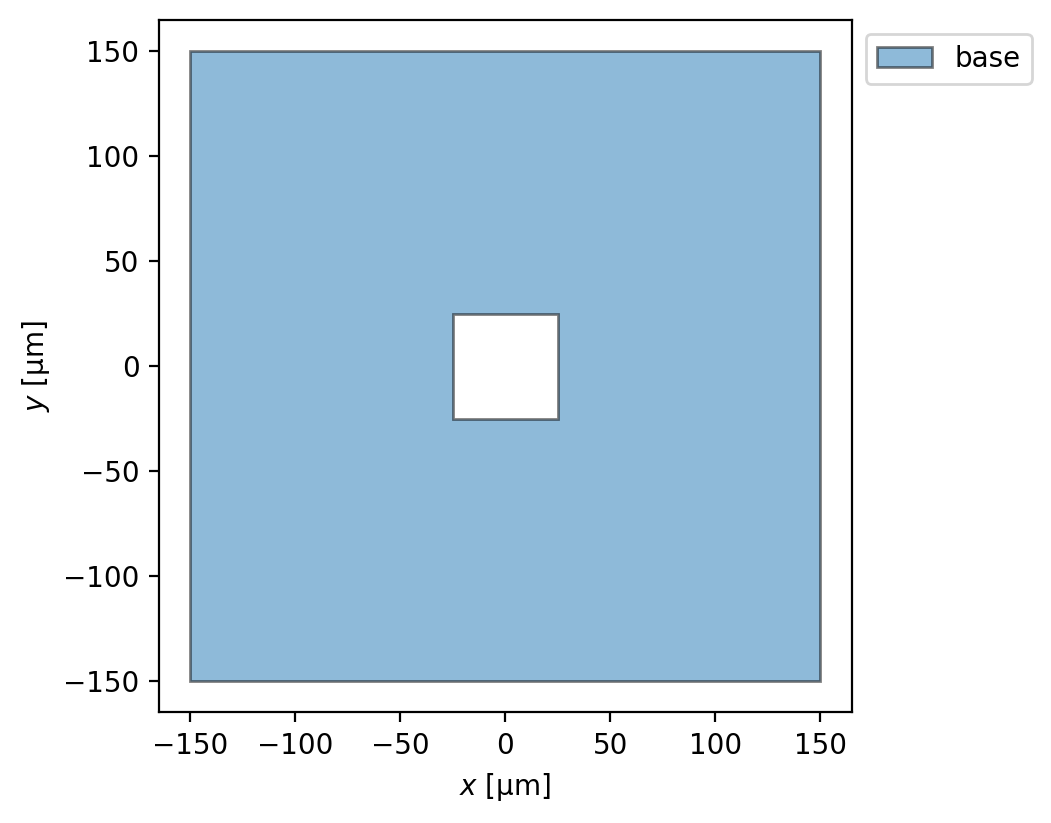

In [64]:
# okay jut to make sure im not insane, im gonna try something

device = sc.Device(
    "ring",
    layers=[sc.Layer("base", london_lambda=0.100, thickness=0.025, z0=0)],
    films=[sc.Polygon("ring", layer="base", points=ring)],
    holes=[sc.Polygon("hole", layer="base", points=hole)],
    length_units=length_units,
)

device.make_mesh(smooth=0)

fig, ax = device.draw(legend=True)